# Introduction

## Final Project Submission

***
- Student Name: Adam Marianacci
- Student Pace: Flex
- Scheduled project review date/time: TBD
- Instructor Name: Mark Barbour

# Business Understanding

It is my job to help the WWFA (Water Wells For Africa) organization identify wells that are in need or repair in Tanzania.

# Data Understanding

The data used in this analysis comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. The final dataframe used in this analysis contained over 38,000 entries. The dataset consisted of various information about waterwells in Tanzania such as the functioning status, water quality,  age, source, and altitude to name a few. One limitation of the dataset is that it is a fairly small since we are dealing with predictive modeling. There were also some features that would have been useful but just had too many missing values to use. Another limitation was that many of the features in the dataset were shown to have insignificant importance when it came to predicting wells that were in need of repair. The dataset was suitable for the project because it did reveal some notable features about wells. I was able to gain insight into identifying where repairs were needed to help the WWFA promote access to potable water across Tanzania.

# Data Preperation

In [1]:
# Importing the necessary libraries
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import folium
import statsmodels as sm
import sklearn
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

I did not want any information in the dataframe to be truncated. I searched `pandas output truncated` in google and found this [solution](https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver).

In [2]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Importing the dataframes
df_x = pd.read_csv('data/training_set_values.csv')
df_y = pd.read_csv('data/training_set_labels.csv')

In [4]:
# Combining the 2 dataframes into 1 new dataframe
Waterwells_df = pd.concat([df_y, df_x], axis=1)

In [5]:
# Previewing the dataframe
Waterwells_df.head()

,id,status_group,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
# Checking the datatypes in my df along with missing values
Waterwells_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   id                     59400 non-null  int64  
 3   amount_tsh             59400 non-null  float64
 4   date_recorded          59400 non-null  object 
 5   funder                 55765 non-null  object 
 6   gps_height             59400 non-null  int64  
 7   installer              55745 non-null  object 
 8   longitude              59400 non-null  float64
 9   latitude               59400 non-null  float64
 10  wpt_name               59400 non-null  object 
 11  num_private            59400 non-null  int64  
 12  basin                  59400 non-null  object 
 13  subvillage             59029 non-null  object 
 14  region                 59400 non-null  object 
 15  re

Dropping columns that are not directly related to the business problem and also have high cardinality, making them difficult to one hot encode.

In [7]:
# Dropping irrelevant columns from the dataframe, also columns with large amounts of missing data
columns_to_drop = [
    'id', 'scheme_management', 'region', 'region_code',
    'payment', 'public_meeting', 'district_code', 'population','amount_tsh',
    'num_private', 'basin', 'latitude', 'longitude',
    'waterpoint_type_group', 'source_class', 'payment_type', 'management_group', 'recorded_by', 
    'extraction_type', 'management', 
    'source_type', 'extraction_type_group', 'permit', 'funder',
    'date_recorded', 'installer', 'ward', 'scheme_name', 'wpt_name', 'lga', 'subvillage'
]

Waterwells_df = Waterwells_df.drop(columns_to_drop, axis=1, errors='ignore')


Setting up my 'y' value to become a binary class. Needs repair -'1' , Does Not need repair - '0'. I wanted to replace 'functional needs repair to read as a '1' for needing repair.

In [8]:
# Create a new column 'needs_repair' by merging the two categories
Waterwells_df['needs_repair'] = Waterwells_df['status_group'].replace(
    {'functional': 0, 'non functional': 1, 
     'functional needs repair': 1})

# Drop the original 'status_group' column
Waterwells_df.drop('status_group', axis=1, inplace=True)

#Display the updated DataFrame
Waterwells_df.head()



,gps_height,construction_year,extraction_type_class,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,needs_repair
0,1390,1999,gravity,soft,good,enough,enough,spring,communal standpipe,0
1,1399,2010,gravity,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe,0
2,686,2009,gravity,soft,good,enough,enough,dam,communal standpipe multiple,0
3,263,1986,submersible,soft,good,dry,dry,machine dbh,communal standpipe multiple,1
4,0,0,gravity,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe,0


I wanted to change the construction year into a new column 'age' so it could be easier to work with.

In [9]:
#dropping the missing values from the 'construction_year' column and creating a new df
Construction_Year_df = Waterwells_df[Waterwells_df['construction_year'] != 0]

# Calculate the current year
current_year = datetime.now().year

# Create a new column 'age' by subtracting construction year from the current year
Construction_Year_df['age'] = current_year - Waterwells_df['construction_year']

In [10]:
# deleting the 'construction_year' column since we replaced it with an 'age' column
Construction_Year_df = Construction_Year_df.drop('construction_year', axis=1)

We have a class imbalance with the majority of wells not needing repair.

In [11]:
# Viewing the value counts of 'needs_repair'
Construction_Year_df['needs_repair'].value_counts()

0    21704
1    16987
Name: needs_repair, dtype: int64

In [12]:
# previewing the new df
Construction_Year_df.head()

,gps_height,extraction_type_class,water_quality,quality_group,quantity,quantity_group,source,waterpoint_type,needs_repair,age
0,1390,gravity,soft,good,enough,enough,spring,communal standpipe,0,25
1,1399,gravity,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe,0,14
2,686,gravity,soft,good,enough,enough,dam,communal standpipe multiple,0,15
3,263,submersible,soft,good,dry,dry,machine dbh,communal standpipe multiple,1,38
5,0,submersible,salty,salty,enough,enough,other,communal standpipe multiple,0,15


The mean of age is 27.12 and the median is 24 which means the distribuition is slightly skewed to the right. There are a few values on the higher end that are pulling the mean up relative to the median.

In [13]:
# Looking at some descriptive statistics of the df
Construction_Year_df.describe()

,gps_height,needs_repair,age
count,38691.000000,38691.000000,38691.000000
mean,1002.367760,0.439043,27.185314
std,618.078669,0.496277,12.472045
min,-63.000000,0.000000,11.000000
25%,372.000000,0.000000,16.000000
50%,1154.000000,0.000000,24.000000
75%,1488.000000,1.000000,37.000000
max,2770.000000,1.000000,64.000000


In [14]:
# Checking the 
Construction_Year_df['waterpoint_type'].value_counts()

communal standpipe             21382
hand pump                       8759
communal standpipe multiple     4261
other                           3837
improved spring                  367
cattle trough                     80
dam                                5
Name: waterpoint_type, dtype: int64

In [15]:
# Checking the data types once again and making sure I no longer have any missing values
Construction_Year_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gps_height             38691 non-null  int64 
 1   extraction_type_class  38691 non-null  object
 2   water_quality          38691 non-null  object
 3   quality_group          38691 non-null  object
 4   quantity               38691 non-null  object
 5   quantity_group         38691 non-null  object
 6   source                 38691 non-null  object
 7   waterpoint_type        38691 non-null  object
 8   needs_repair           38691 non-null  int64 
 9   age                    38691 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.2+ MB


In [16]:
# Defining X and y variables
y = Construction_Year_df["needs_repair"]
X = Construction_Year_df.drop("needs_repair", axis=1)

In [17]:
# Performing a train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
# Looking at the number of missing values in each column
X_train.isna().sum()

gps_height               0
extraction_type_class    0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
waterpoint_type          0
age                      0
dtype: int64

In [19]:
# Create a list of all the categorical features
cols_to_transform = ['quantity_group', 'waterpoint_type','extraction_type_class',
                     'quality_group', 'source',
                     'water_quality', 'quantity']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
X_train = pd.get_dummies(
    data=X_train, columns=cols_to_transform, drop_first=True, dtype=int)

In [20]:
# Checking to see if all the data is now numerical - yes. 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30952 entries, 3488 to 24205
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   gps_height                                   30952 non-null  int64
 1   age                                          30952 non-null  int64
 2   quantity_group_enough                        30952 non-null  int64
 3   quantity_group_insufficient                  30952 non-null  int64
 4   quantity_group_seasonal                      30952 non-null  int64
 5   quantity_group_unknown                       30952 non-null  int64
 6   waterpoint_type_communal standpipe           30952 non-null  int64
 7   waterpoint_type_communal standpipe multiple  30952 non-null  int64
 8   waterpoint_type_dam                          30952 non-null  int64
 9   waterpoint_type_hand pump                    30952 non-null  int64
 10  waterpoint_type_imp

In [21]:
# previewing my new one hot encoded df
X_train.head()

,gps_height,age,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
3488,1455,19,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
12678,229,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
37313,1588,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
20930,1466,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3639,1542,34,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


Scaling the data of 'gps_height' so that it could be represented appropriately.

In [22]:
# Defining the columns to scale
column_to_scale = ['gps_height']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns and transform the data
X_train[column_to_scale] = scaler.fit_transform(X_train[column_to_scale])

In [23]:
# Inspecting the data to make sure it was scaled
X_train.head()

,gps_height,age,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
3488,0.535828,19,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
12678,0.103071,17,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
37313,0.582774,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
20930,0.539711,17,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3639,0.566537,34,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


I wanted to create a visual of how many wells needed repair at different altitudes. The most repairs are needed around sea level. The fewest are needed over 2,000 feet. However this could be due to just fewer wells exist at higher altitudes.

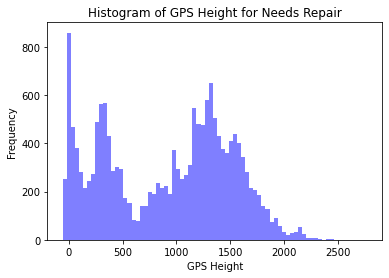

In [24]:
# Filtering the data based on 'needs_repair'
needs_repair_histogram = Construction_Year_df[Construction_Year_df['needs_repair'] == 1]['gps_height']

#plotting a histogram
plt.hist(needs_repair_histogram, bins=75, color='blue', alpha=0.5)
plt.xlabel('GPS Height')
plt.ylabel('Frequency')
plt.title('Histogram of GPS Height for Needs Repair')
plt.show()

Next I wanted to see the total number of wells at each altitude. Yes we have the most wells near sea level and the fewest at an altitude of 2300 ft or higher.

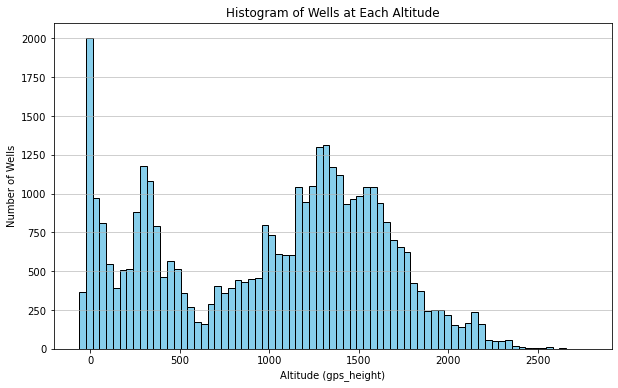

In [25]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(Construction_Year_df['gps_height'], bins=75, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Wells at Each Altitude')
plt.xlabel('Altitude (gps_height)')
plt.ylabel('Number of Wells')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

Finally I wanted to create a visual for the ratio of wells that need repair to the total number of wells at each altitude.

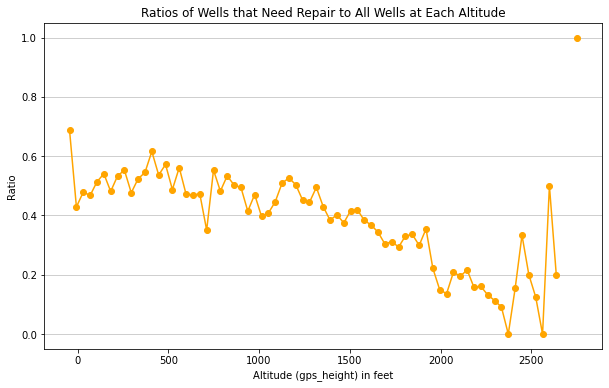

In [26]:
# Create a histogram for 'gps_height' for all wells
all_histogram, bin_edges_all = np.histogram(Construction_Year_df['gps_height'], bins=75)

# Create a histogram for 'gps_height' for wells that need repair
needs_repair_histogram, bin_edges_needs_repair = np.histogram(
    Construction_Year_df[Construction_Year_df['needs_repair'] == 1]['gps_height'], bins=75)

# Calculate the ratios
ratios = needs_repair_histogram / all_histogram.astype(float)

# Calculate the bin centers
bin_centers = (bin_edges_all[:-1] + bin_edges_all[1:]) / 2

# Plot the ratios
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, ratios, color='orange', marker='o')

# Customize the plot
plt.title('Ratios of Wells that Need Repair to All Wells at Each Altitude')
plt.xlabel('Altitude (gps_height) in feet')
plt.ylabel('Ratio')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

The above graph shows the relationship is generally negative. As altitude increases the repair ratio decreases. However around the 2,400 ft mark the relationship turns generally positive and repair ratio starts to increase.

Next I wanted to get some visuals related to 'age' and 'repairs'.

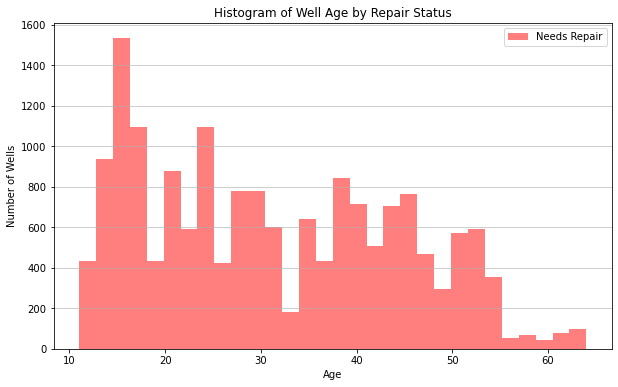

In [27]:
# Filtering data for wells that need repair and those that don't
needs_repair_age = Construction_Year_df[Construction_Year_df['needs_repair'] == 1]['age']

# Create histograms for age of wells
plt.figure(figsize=(10, 6))
plt.hist(needs_repair_age, bins=30, alpha=0.5, color='red', label='Needs Repair')

# Customize the plot
plt.title('Histogram of Well Age by Repair Status')
plt.xlabel('Age')
plt.ylabel('Number of Wells')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

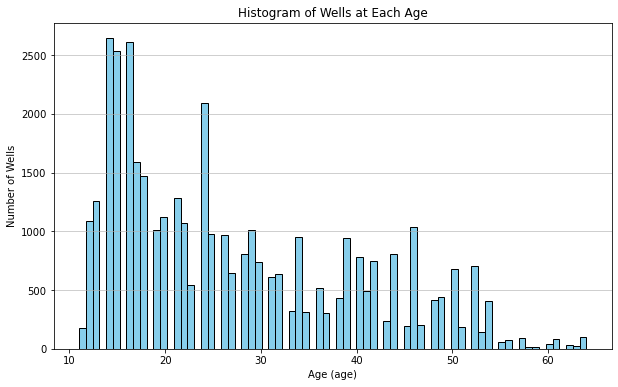

In [28]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(Construction_Year_df['age'], bins=75, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Wells at Each Age')
plt.xlabel('Age (age)')
plt.ylabel('Number of Wells')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

I typed `calculating the bin centers in python` into google and found this [solution](https://stackoverflow.com/questions/72688853/get-center-of-bins-histograms-python)

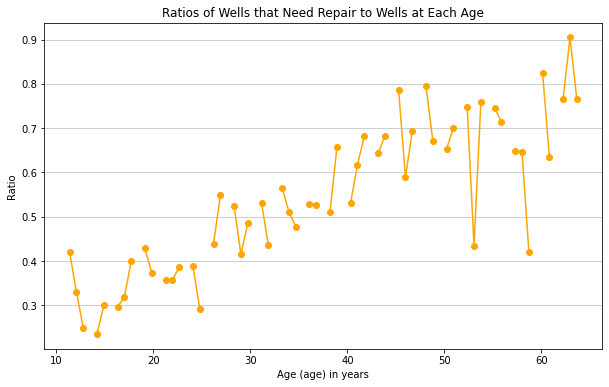

In [29]:
# Create a histogram for 'age' for all wells
all_histogram_age, bin_edges_all = np.histogram(Construction_Year_df['age'], bins=75)

# Create a histogram for 'gps_height' for wells that need repair
needs_repair_histo, bin_edges_needs_repair = np.histogram(
    Construction_Year_df[Construction_Year_df['needs_repair'] == 1]['age'], bins=75)

# Calculate the ratios
ratios = needs_repair_histo / all_histogram_age.astype(float)

# Calculate the bin centers
bin_centers = (bin_edges_all[:-1] + bin_edges_all[1:]) / 2

# Plot the ratios
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, ratios, color='orange', marker='o')

# Customize the plot
plt.title('Ratios of Wells that Need Repair to Wells at Each Age')
plt.xlabel('Age (age) in years')
plt.ylabel('Ratio')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

# Modeling

In [30]:
# Building a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

The classifier was about 74% accurate on the training data which is not great.

In [31]:
# Checking the performance on the training data
y_hat_train = logreg.predict(X_train)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    22982
1     7970
Name: Residuals (counts), dtype: int64

0    0.742505
1    0.257495
Name: Residuals (proportions), dtype: float64


In [32]:
# Looking at the number of missing values in each column
X_test.isna().sum()

gps_height               0
extraction_type_class    0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
waterpoint_type          0
age                      0
dtype: int64

In [33]:
# Create a list of all the categorical features
cols_to_transform = ['quantity_group', 'waterpoint_type','extraction_type_class',
                     'quality_group', 'source',
                     'water_quality', 'quantity']
# Create a dataframe with the new dummy columns created from the cols_to_transform list
X_test = pd.get_dummies(
    data=X_test, columns=cols_to_transform, drop_first=True, dtype=int)

In [34]:
# Fit the scaler on the specified columns and transform the data
X_test[column_to_scale] = scaler.fit_transform(X_test[column_to_scale])

In [35]:
logreg.score(X_test, y_test)

0.737175345651893

We are still about 74% accuarate on our test data.

In [36]:
y_hat_test = logreg.predict(X_test)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    5705
1    2034
Name: Residuals (counts), dtype: int64

0    0.737175
1    0.262825
Name: Residuals (proportions), dtype: float64


The cross validation scores are showing all close to 74% on our 10 folds, showing that we are still consistent with multiple samples from the data.

In [37]:
# Getting the cross validation score from our log regression model with X_train and y_train values
cvscore = cross_val_score(logreg, X_train, y_train.values, cv=10)

In [38]:
# Viewing the scores for the 10 folds we wanted to see, they are all fairly consisten to around 74%
cvscore

array([0.74031008, 0.74903101, 0.7450727 , 0.72471729, 0.74087237,
       0.74894992, 0.73893376, 0.74216478, 0.74927302, 0.7457189 ])

In [39]:
# Confirming the avg cross validation score
np.average(cvscore)

0.7425043831636422

In [40]:
# Looking at standard deviation, this score shows to be very close to the mean
np.std(cvscore)

0.006954203732412136

Building a single decision tree, this model did not show an improvement from logistic regression. The accuracy (f-1 score) which averages precision and recall was at about 72%. It showed gps_height and altitude to be the most important features with gps_height being the most with a score of 0.47 which shows that there is a significant relationship with a well needing repair.

In [41]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
# Using the trained classifier 'clf' 
#to predict the labels for the instances represented by the features in the X_test
#storing the predicted labels into 'y_pred'
y_pred = clf.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4337
           1       0.68      0.68      0.68      3402

    accuracy                           0.72      7739
   macro avg       0.71      0.71      0.71      7739
weighted avg       0.72      0.72      0.72      7739



In [44]:
# getting our feature_importance scores
clf.feature_importances_

array([4.79816343e-01, 1.74812000e-01, 1.84100988e-04, 2.22899632e-02,
       4.97448047e-04, 0.00000000e+00, 1.89622563e-02, 1.63778536e-02,
       0.00000000e+00, 3.60068991e-03, 1.46870775e-03, 7.86451547e-02,
       2.93949110e-03, 4.82473003e-03, 9.20939491e-03, 2.73276068e-03,
       1.27792901e-02, 4.66670366e-04, 7.01823585e-04, 4.18323094e-03,
       4.80869033e-04, 3.18405052e-03, 8.13603197e-04, 1.87655901e-03,
       1.84158430e-03, 1.34839312e-02, 1.98838598e-03, 5.54784855e-03,
       1.31794695e-02, 7.08641897e-03, 1.53148000e-02, 2.13015414e-04,
       4.38766960e-04, 1.12697248e-04, 3.89693481e-04, 3.93425091e-03,
       1.29127442e-03, 5.29145362e-03, 2.59869890e-03, 3.93550002e-02,
       3.04321020e-04, 4.30340922e-02, 3.74730587e-03])

In [45]:
# With correlating columns
print("clf.feature_importances_:", clf.feature_importances_)
print("X.columns:", X_train.columns)

clf.feature_importances_: [4.79816343e-01 1.74812000e-01 1.84100988e-04 2.22899632e-02
 4.97448047e-04 0.00000000e+00 1.89622563e-02 1.63778536e-02
 0.00000000e+00 3.60068991e-03 1.46870775e-03 7.86451547e-02
 2.93949110e-03 4.82473003e-03 9.20939491e-03 2.73276068e-03
 1.27792901e-02 4.66670366e-04 7.01823585e-04 4.18323094e-03
 4.80869033e-04 3.18405052e-03 8.13603197e-04 1.87655901e-03
 1.84158430e-03 1.34839312e-02 1.98838598e-03 5.54784855e-03
 1.31794695e-02 7.08641897e-03 1.53148000e-02 2.13015414e-04
 4.38766960e-04 1.12697248e-04 3.89693481e-04 3.93425091e-03
 1.29127442e-03 5.29145362e-03 2.59869890e-03 3.93550002e-02
 3.04321020e-04 4.30340922e-02 3.74730587e-03]
X.columns: Index(['gps_height', 'age', 'quantity_group_enough',
       'quantity_group_insufficient', 'quantity_group_seasonal',
       'quantity_group_unknown', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'wat

gps_height and age were really the only 2 significant features

In [46]:
# Setting up a cleaner way of viewing them in a DF
features = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])
print(features)

                                             Importance
gps_height                                     0.479816
age                                            0.174812
quantity_group_enough                          0.000184
quantity_group_insufficient                    0.022290
quantity_group_seasonal                        0.000497
quantity_group_unknown                         0.000000
waterpoint_type_communal standpipe             0.018962
waterpoint_type_communal standpipe multiple    0.016378
waterpoint_type_dam                            0.000000
waterpoint_type_hand pump                      0.003601
waterpoint_type_improved spring                0.001469
waterpoint_type_other                          0.078645
extraction_type_class_handpump                 0.002939
extraction_type_class_motorpump                0.004825
extraction_type_class_other                    0.009209
extraction_type_class_rope pump                0.002733
extraction_type_class_submersible              0

Building a Random Forest Model. This model improved slightly by showing a 75% on accuracy (f-1 score). This was a slight improvement from our 74% on our baseline logistic regression model but still not great.

In [47]:
#  initializing a Random Forest classifier object that can then be trained on data and used to make predictions.
rf = RandomForestClassifier()

In [48]:
# fitting the training and testing data to the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Using the trained classifier 'rf' 
#to predict the labels for the instances represented by the features in the X_test
#storing the predicted labels into 'y_pred'
y_pred = rf.predict(X_test)

In [50]:
# Checking the accuracy of the model
rf.score(X_test, y_test)

0.7533273032691562

In [51]:
# Viewing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      4337
           1       0.73      0.70      0.71      3402

    accuracy                           0.75      7739
   macro avg       0.75      0.75      0.75      7739
weighted avg       0.75      0.75      0.75      7739



Again, gps_height and age were the only 2 significant features

In [52]:
# Checking to see what features were the most important in the model
features = pd.DataFrame(rf.feature_importances_, index = X_train.columns)
print(features)

                                                    0
gps_height                                   0.466752
age                                          0.209664
quantity_group_enough                        0.026892
quantity_group_insufficient                  0.013802
quantity_group_seasonal                      0.011288
quantity_group_unknown                       0.001313
waterpoint_type_communal standpipe           0.021237
waterpoint_type_communal standpipe multiple  0.013303
waterpoint_type_dam                          0.000098
waterpoint_type_hand pump                    0.007576
waterpoint_type_improved spring              0.001871
waterpoint_type_other                        0.043604
extraction_type_class_handpump               0.007479
extraction_type_class_motorpump              0.004380
extraction_type_class_other                  0.030542
extraction_type_class_rope pump              0.001703
extraction_type_class_submersible            0.008811
extraction_type_class_wind-p

In [53]:
# Sorting the features by most influential to least
features_sorted = features.sort_values(by=0, ascending=False)
print(features_sorted)

                                                    0
gps_height                                   0.466752
age                                          0.209664
waterpoint_type_other                        0.043604
extraction_type_class_other                  0.030542
quantity_enough                              0.028705
quantity_group_enough                        0.026892
waterpoint_type_communal standpipe           0.021237
quantity_insufficient                        0.018089
quantity_group_insufficient                  0.013802
quantity_seasonal                            0.013680
waterpoint_type_communal standpipe multiple  0.013303
quantity_group_seasonal                      0.011288
source_spring                                0.009766
extraction_type_class_submersible            0.008811
waterpoint_type_hand pump                    0.007576
extraction_type_class_handpump               0.007479
source_machine dbh                           0.007456
source_river                

Building a second Random Forest model with hyperparameters. This showed to improve the model to about a 78% accuracy (f-1 score). It also showed a 76% on the weighted avg. for recall. I chose to look at the macro avg. to be more conservative as this gave a lower score than the weighted avg. 

In [54]:
# Using hyperparameters to hopefully improve the model. 
# Adding more trees to the forest to increase performance.
# Using min_samples_split to help control overfitting
# Using max depth so trees can grow deeper and learn more information.
# Using a random state so results will be reproducible across multiple runs.
rf2 = RandomForestClassifier(n_estimators = 1000,
                            criterion = 'entropy',
                            min_samples_split = 10,
                            max_depth = 15,
                            random_state = 42
)

In [55]:
# fitting the training and testing data to the model
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=10,
                       n_estimators=1000, random_state=42)

This model received a mean accuracy score of 77% which is an improvement.

In [56]:
# Checking the accuracy of the model
rf2.score(X_test, y_test)

0.7771029848817677

In [57]:
# Using the trained classifier 'rf2' 
#to predict the labels for the instances represented by the features in the X_test
#storing the predicted labels into 'y_pred2'
y_pred2 = rf2.predict(X_test)

In [58]:
# Viewing the classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      4337
           1       0.85      0.60      0.70      3402

    accuracy                           0.78      7739
   macro avg       0.80      0.76      0.76      7739
weighted avg       0.79      0.78      0.77      7739



In [59]:
# Checking to see what features were the most important in the model
features = pd.DataFrame(rf2.feature_importances_, index = X_train.columns)
print(features)

                                                    0
gps_height                                   0.174928
age                                          0.204496
quantity_group_enough                        0.052745
quantity_group_insufficient                  0.030399
quantity_group_seasonal                      0.026672
quantity_group_unknown                       0.003800
waterpoint_type_communal standpipe           0.041878
waterpoint_type_communal standpipe multiple  0.024623
waterpoint_type_dam                          0.000199
waterpoint_type_hand pump                    0.013010
waterpoint_type_improved spring              0.004313
waterpoint_type_other                        0.085681
extraction_type_class_handpump               0.013270
extraction_type_class_motorpump              0.007218
extraction_type_class_other                  0.060175
extraction_type_class_rope pump              0.003420
extraction_type_class_submersible            0.013185
extraction_type_class_wind-p

Age, and gps_height

In [60]:
# Sorting the features by most influential to least
features_sorted = features.sort_values(by=0, ascending=False)
print(features_sorted)

                                                    0
age                                          0.204496
gps_height                                   0.174928
waterpoint_type_other                        0.085681
extraction_type_class_other                  0.060175
quantity_group_enough                        0.052745
quantity_enough                              0.051274
waterpoint_type_communal standpipe           0.041878
quantity_insufficient                        0.032429
quantity_group_insufficient                  0.030399
quantity_seasonal                            0.028103
quantity_group_seasonal                      0.026672
waterpoint_type_communal standpipe multiple  0.024623
source_spring                                0.018249
extraction_type_class_handpump               0.013270
extraction_type_class_submersible            0.013185
waterpoint_type_hand pump                    0.013010
source_machine dbh                           0.012076
water_quality_unknown       

In [61]:
# Checking the dimensions of the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[3448  889]
 [1020 2382]]


The confusion matrix shows that our True/Positives are 2,388, our True/Negatives are 3,440. The False/Positives are at 897, and the False/Negatives are 1,014. This sample shows that the model is predicting a FN 13% of the time which is not good. 

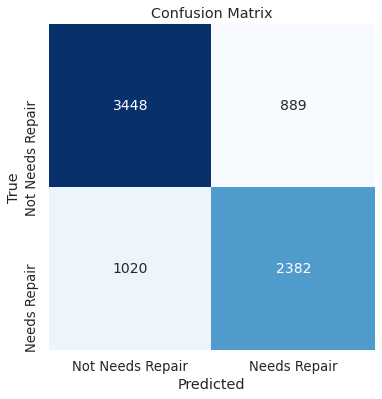

In [62]:
# Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up a figure and axis
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, square=True,
            xticklabels=['Not Needs Repair', 'Needs Repair'],
            yticklabels=['Not Needs Repair', 'Needs Repair'])

# Labeling and viewing the cm
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluation

My best performing model was my rf2 model which was the second Random Forest model with hyperparameters. It showed a 76% on the macro avg. (where all classes equally contribute to the final averaged metric) of recall. Although this isn't great, it does help in identifying wells that are in need of repair. I focused on recall because it explains how many of the actual positive cases we were able to predict correctly. The confusion matrix showed that the model was falsely identifying wells 13% of the time on a sample size that was 20% of our total data. When it came to the problem of  the business understanding it was more of a concern to identify false negatives , labeling wells as not needing repair that are actually in need of repair will lead to people not having access to clean water. It showed age and gps_height as the 2 most important features with "age" as the most important feature which was different from the other models that showed gps_height as the feature of most importance. 

# Conclusion

The 'rf2' which was the 2nd Random Forest Model with hyperparameters was our best peforming model which showed a 76% macro avg. on recall. Although this wasn't a stellar score in helped to gain insights on wells that should be repaired. We need to gather more data (hundreds of thousands more entries) from features that show higher importance percentages, this will improve the predictive capabilites of our models. I found that there was a positive relationship between the ratio of wells needing repair and the age of a well. I also discovered there is generally a negative relationship between the ratio of wells needing repair and the altitude of a well from slightly below sea level to roughly 2,400 feet above sea level. I noticed after 2,400 feet the relationship changes to a positive one. More analysis needs to be conducted to draw conclusions about this relationship.

# Recommendations

I recommend that there should be an age threshold on waterwells that require repair/replacement of every well by the age of 20. My analysis indicates that roughly 50% of wells are in need of repairs by the age of 30. If we send repair specialists to wells starting at the age of 20 we can tackle problems before they become larger issues potenitally leaving people without clean drinking water. I also recommend we gather more data regarding population around the well. Anything mechanical undergoes 'wear and tear' the more it is used. Gathering more information on the population around the wells will show what kind of impact this has on the ratio of wells needing repair. This may also help us understand the relationship of the ratio of wells needing repairs at each altitude, since the reasons were inconclusive. Lastly I recommend gathering more data on geographic location to see what wells were not functioning because of mechanical issues and which wells were not functioning due to a lack of water supply, looking at areas susceptile to droughts would be one example of how further data would be useful to locate problem wells due to geographic location.

# Limitations

The main limitation of this dataset was that there were not many features that showed significant importance in our models. There was also a lot of missing values in the dataset, too many to the point where certain features could not be used. Also the final dataframe used consisted of only 38,000 entries, gathering 10x more data on features with greater importance to our target variable will improve our model.

# Next Steps

We need to start making repairs mandatory and start replacing wells at the age of 20. We need to look at data regarding population around the well to see if this is having an impact on the lifespan of a well. The more use the well undergoes the quicker it is likely to breakdown I suspect. Having access to this information would certainly help our model. We  also need to gather more geographic data around the wells to learn more about the reasons wells are not functioning (mechanical or geographic issues (a drought etc. causing a lack of water supply). Lastly I would like to gather data on how the well is maintained. How frequently are the wells checked to be working properly and by who? trained or untrained people? This could also have an impact on the longevity of a well. Are wells in cities looked after more than ones in rural areas? This would help in locating problem areas for repairs. 